## Obtaining the Efficient Frontier - Part III

*Suggested Answers follow (usually there are multiple ways to solve a problem in Python).*

Ok, let’s continue the exercise from the last lecture.

In [39]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['WMT', 'FB']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [40]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.97380828, 0.02619172])

Now, estimate the expected Portfolio Return, Variance, and Volatility.

Expected Portfolio Return:

In [41]:
np.sum(weights * log_returns.mean()) * 250

0.09201485791611207

Expected Portfolio Variance:

In [42]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.04165898427449755

Expected Portfolio Volatility:

In [43]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.20410532642363244

***

The rest of this exercise will be a reproduction of what we did in the previous video.

1)	Create two empty lists. Name them pf_returns and pf_volatilites.

In [44]:
pf_returns = []
pf_volatilities = []

2)	Create a loop with 1,000 iterations that will generate random weights, summing to 1, and will append the obtained values for the portfolio returns and the portfolio volatilities to pf_returns and pf_volatilities, respectively.

In [100]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
#pf_returns, pf_volatilities

ValueError: operands could not be broadcast together with shapes (2,) (3,) 

3)	Transform the obtained lists into NumPy arrays and reassign them to pf_returns and pf_volatilites. Once you have done that, the two objects will be NumPy arrays. 

In [46]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)

#pf_returns, pf_volatilities

Now, create a dictionary, called portfolios, whose keys are the strings “Return” and “Volatility” and whose values are the NumPy arrays pf_returns and pf_volatilities. 

In [47]:
portfolios = pd.DataFrame({'Return': pf_returns, 'Volatility': pf_volatilities})
portfolios.head()

,Return,Volatility
0,0.127628,0.190869
1,0.148919,0.201766
2,0.181247,0.240413
3,0.139649,0.195360
4,0.117133,0.190685


Finally, plot the data from the portfolios dictionary on a graph. Let the x-axis represent the volatility data from the portfolios dictionary and the y-axis – the data about rates of return. <br />
Organize your chart well and make sure you have labeled both the x- and the y- axes.

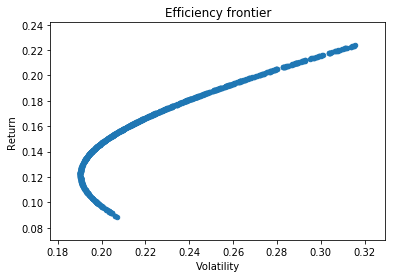

In [48]:

#pf_returns, pf_volatilities
portfolios.plot( x='Volatility', y='Return', kind='scatter', legend=True, title='Efficiency frontier')


In [49]:
portfolios.min()

Return        0.088615
Volatility    0.190331
dtype: float64

******

What do you think would happen if you re-created the Markowitz Efficient Frontier for 3 stocks? The code you have created is supposed to accommodate easily the addition of a third stock, say British Petroleum (‘BP’). Insert it in your data and re-run the code (you can expand the “Cell” list from the Jupyter menu and click on “Run All” to execute all the cells at once!). <br />

How would you interpret the obtained graph? 


In [50]:
pf_data['BP'] = wb.DataReader('BP', data_source = 'yahoo', start = '2014-1-1')['Adj Close']

Expected Portfolio Return:

In [81]:
weights = np.random.random(len(pf_data.columns))
weights /= np.sum(weights)
print (weights)
np.sum(log_returns['BP'].mean()*250*weights[0]+log_returns['WMT'].mean()*250*weights[1]+log_returns['FB'].mean()*weights[2]*250)

[0.17395904 0.38885311 0.43718785]


0.12477344069120423

In [84]:
print(log_returns.cov())
print ("----------------------")
print(log_returns.corr())


          WMT        FB        BP
WMT  0.000172  0.000061  0.000048
FB   0.000061  0.000403  0.000132
BP   0.000048  0.000132  0.000362
----------------------
          WMT        FB        BP
WMT  1.000000  0.231817  0.190189
FB   0.231817  1.000000  0.345306
BP   0.190189  0.345306  1.000000


Expected Portfolio Variance:

In [85]:
np.dot(np.dot(weights.T,log_returns.cov()*250), weights)
#['BP'].mean()*250*weights[0]+log_returns['WMT'].mean()*250*weights[1]+log_returns['FB'].mean()*weights[2]*250)

0.048946847097322

Expected Portfolio Volatility:

In [86]:
np.sqrt(np.dot(np.dot(weights.T,log_returns.cov()*250), weights))


0.22123934346612495

*****

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


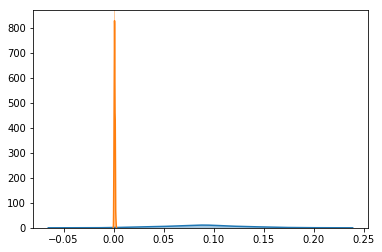

In [78]:
import seaborn as sns

log_returns=np.log(pf_data/pf_data.shift(1))

pf_returns = []
pf_volatilities = []


def mean_f(w1,v):
    return v*w1*250

def var_f(ob,w):
    return np.sqrt(np.dot(np.dot(w.T,ob.cov()*250),w))


for i in range(0,1000):
    weights=np.random.random(len(log_returns.columns))
    weights/=np.sum(weights)
    pf_returns.append(np.sum(mean_f(log_returns['WMT'].mean(), weights[0])+\
          mean_f(log_returns['FB'].mean(), weights[1])+\
          mean_f(log_returns['BP'].mean(), weights[2]))       )
    pf_volatilities.append(var_f(log_returns.cov(),weights))
    
    
    
    
    
sns.distplot(pf_returns)
#np.mean(pf_returns)
sns.distplot(pf_volatilities)

In [90]:
portfolios2=pd.DataFrame({'Return':pf_returns, 'Volatility':pf_volatilities})

Text(0,0.5,'Expected Return')

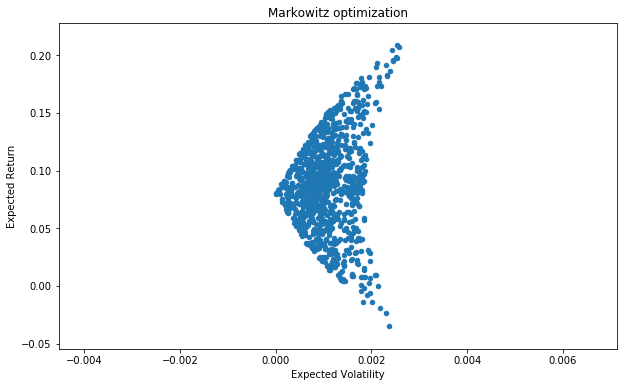

In [93]:
portfolios2.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.title('Markowitz optimization')
plt.ylabel('Expected Return')

In [99]:
portfolios2[portfolios2['Volatility']==portfolios2['Volatility'].min()]



,Return,Volatility
759,0.07981,0.000008


In [98]:
portfolios2[portfolios2['Return']==portfolios2['Return'].max()]


,Return,Volatility
841,0.208515,0.002544
